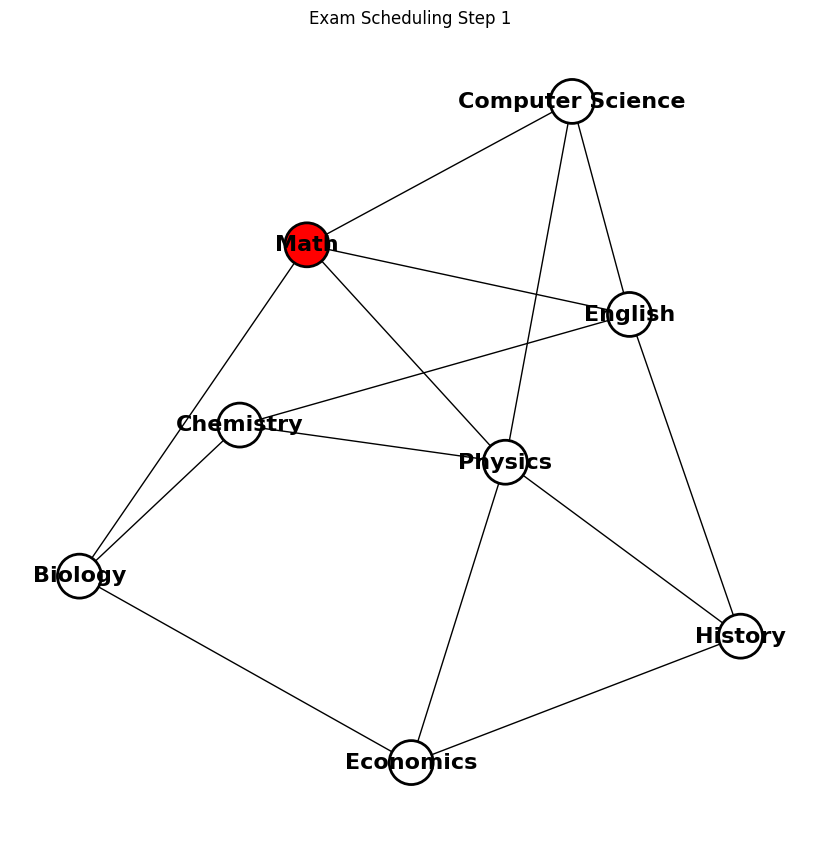

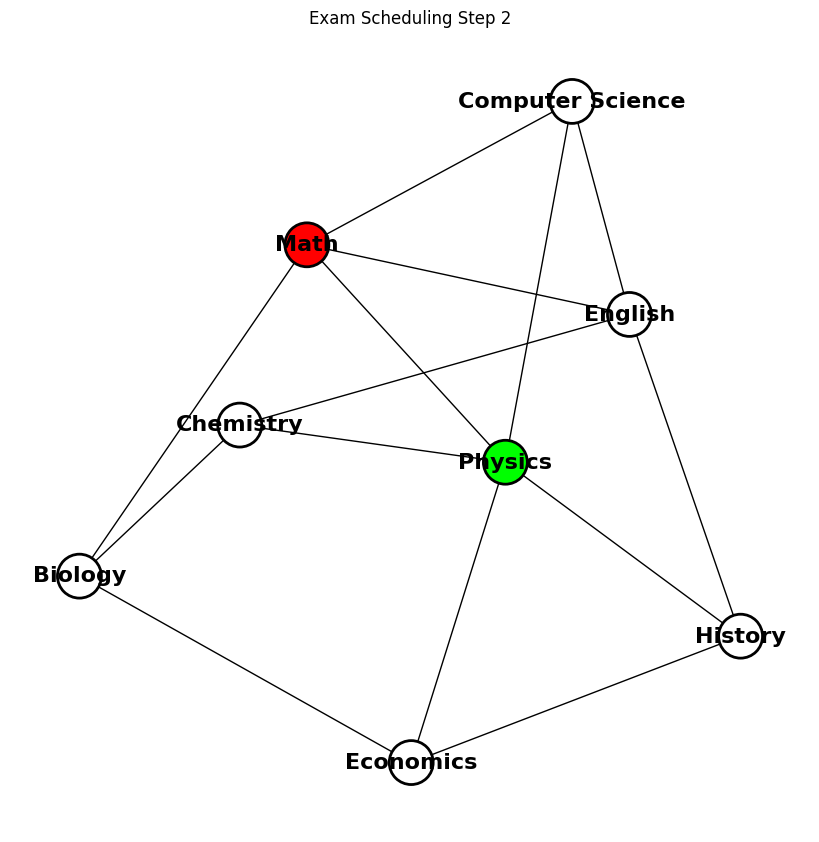

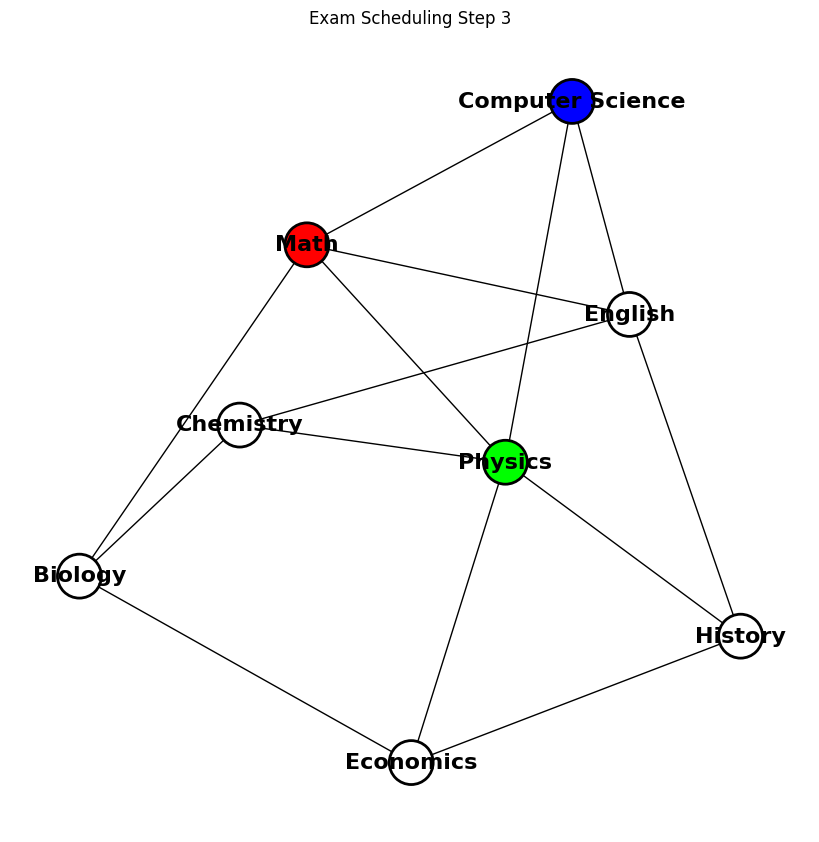

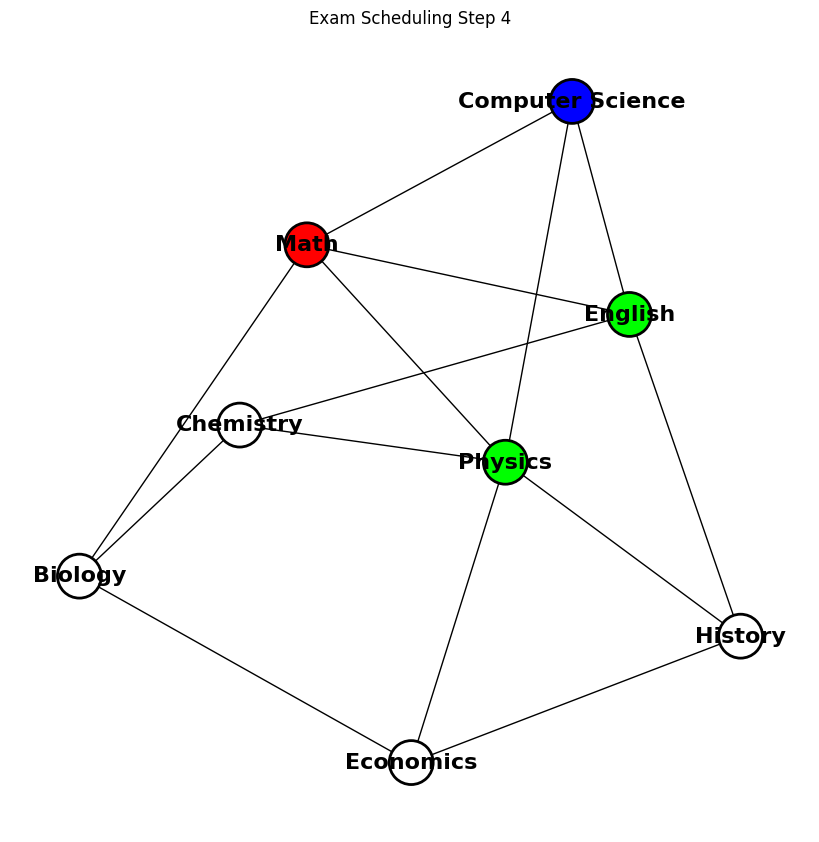

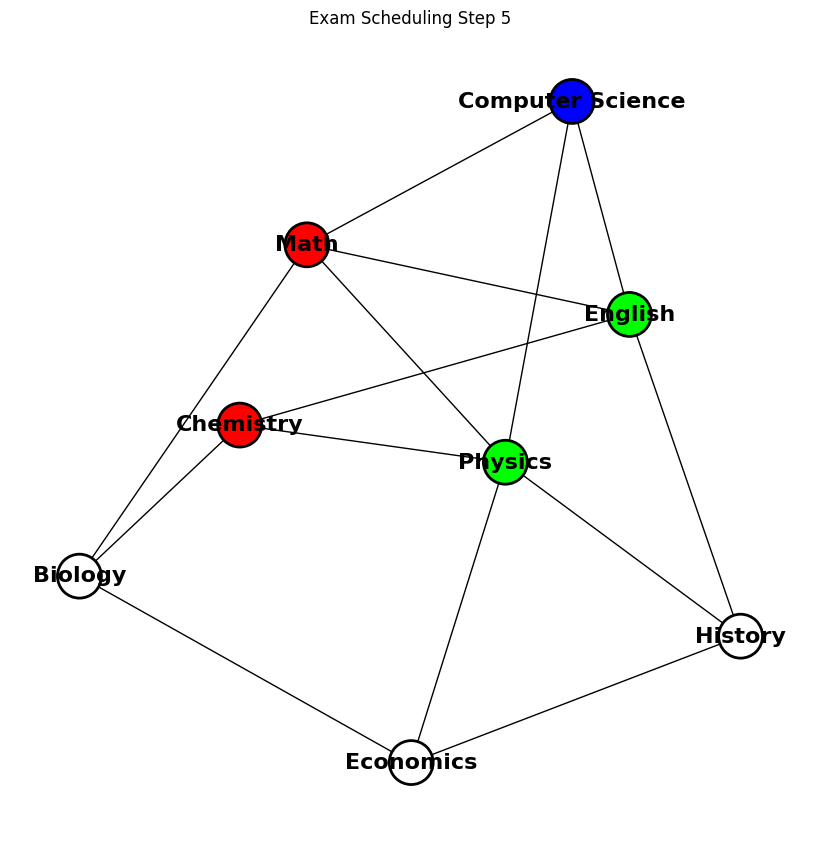

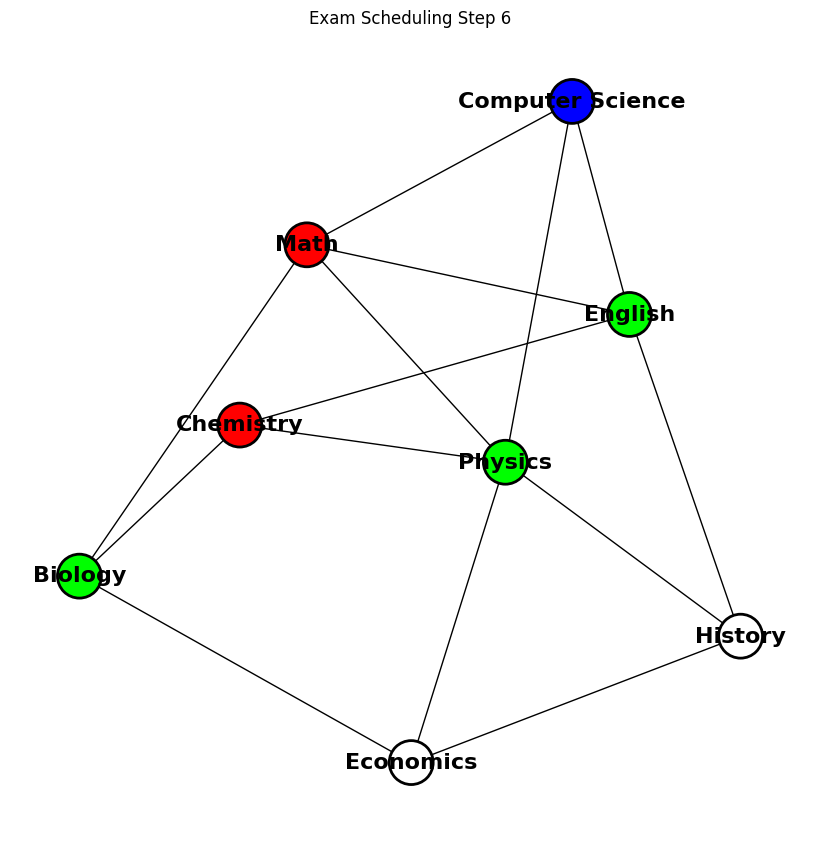

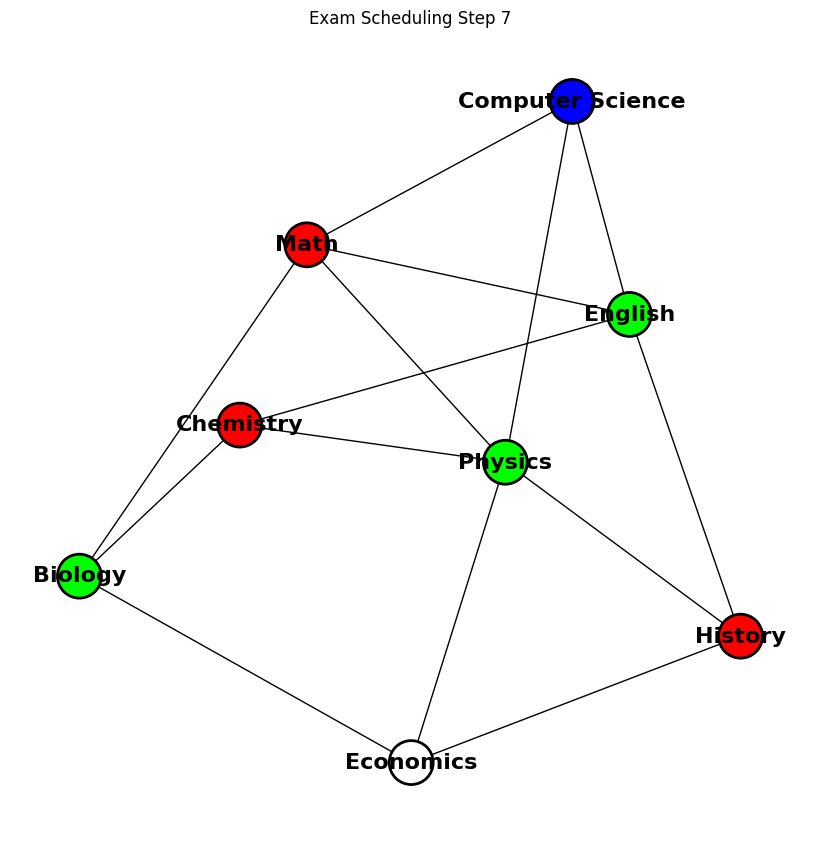

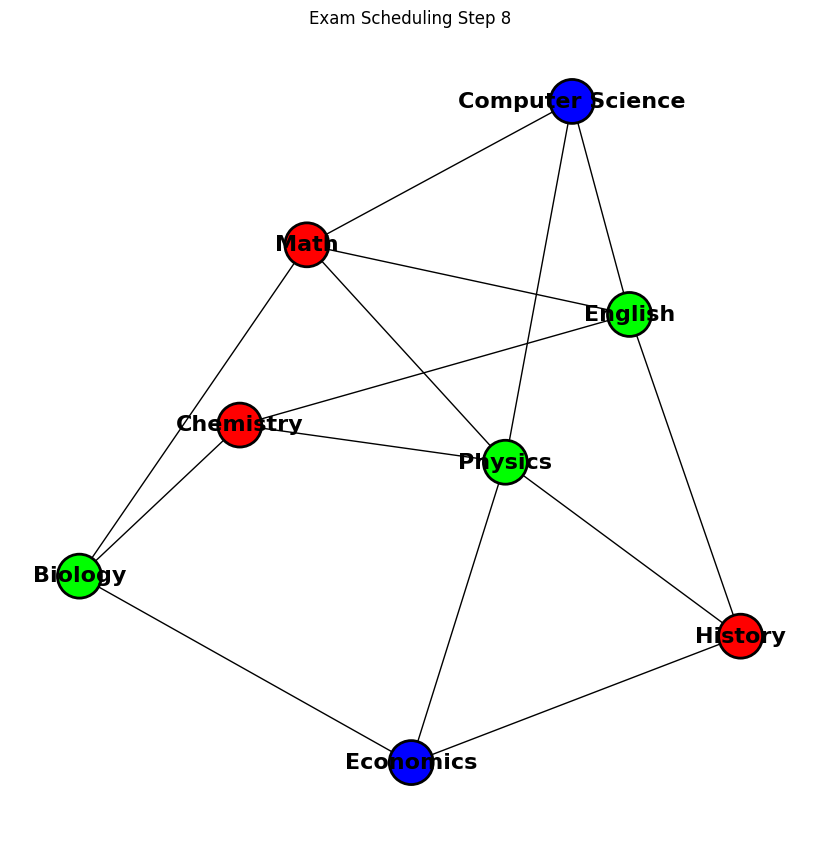

Final Exam Schedule (Course -> Time Slot): {'Math': '#FF0000', 'Physics': '#00FF00', 'Computer Science': '#0000FF', 'English': '#00FF00', 'Chemistry': '#FF0000', 'Biology': '#00FF00', 'History': '#FF0000', 'Economics': '#0000FF'}


In [4]:
# Scenario: Exam Scheduling Problem using Graph Coloring and Minimum Remaining Values (MRV) Heuristic.

# Description:
# This script solves the exam scheduling problem using the graph coloring technique. The goal is to assign time slots
# to different courses such that no two courses sharing students are scheduled at the same time. Each course is
# represented as a node, and an edge between two nodes indicates that the courses share common students and hence
# should not be scheduled at the same time.

# To solve this, we use the MRV (Minimum Remaining Values) heuristic. The MRV heuristic is particularly useful in this
# context because it ensures that courses with the fewest valid time slots remaining (i.e., the most constrained ones)
# are assigned a time slot earlier. This minimizes the chances of conflicts and deadlocks later in the scheduling process.

# Courses:
# - Nodes represent courses (Math, Physics, Chemistry, etc.).
# - Edges represent conflicts (i.e., courses that share students).

# Time Slots:
# - Time slots are represented as colors. We attempt to assign different "colors" (time slots) to nodes (courses)
#   to ensure no conflicts between adjacent nodes.

# Modifications and Explanations:
# 1. Removed Degree Heuristic: The Degree heuristic, which selects the course with the most uncolored neighbors,
#    was removed to focus solely on the MRV heuristic. MRV is a better fit for this scenario because it reduces the
#    chances of creating conflicts by scheduling the most constrained courses first.

# 2. Removed Sequential Assignment: Sequential assignment was also removed because MRV provides a more effective
#    and intelligent way of selecting courses compared to simple sequential processing.

# 3. Visualization Changes: The visualization process shows how the courses are being assigned time slots step by
#    step, ensuring that the MRV heuristic can be visually traced throughout the backtracking process.

# 4. Simplified Input and Heuristic Selection: Since we are only using MRV, the heuristic selection logic was removed
#    to streamline the code.


# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Automatically generate a set of colors based on the number of nodes (time slots for exam scheduling)
def generate_colors(num_nodes):
    # Define a list of colors to represent time slots
    color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500', '#00FF7F']
    # Return the subset of colors required based on the number of nodes
    return color_list[:min(num_nodes, len(color_list))]

# Step 2: Function to create a graph representing the exam scheduling problem
def create_exam_scheduling_graph():
    # Initialize a graph
    G = nx.Graph()

    # Add courses as nodes
    courses = ['Math', 'Physics', 'Chemistry', 'Biology', 'Computer Science', 'English', 'History', 'Economics']
    G.add_nodes_from(courses)

    # Add conflicts (edges) between courses that share students
    conflicts = [('Math', 'Physics'),
                 ('Math', 'Computer Science'),
                 ('Physics', 'Chemistry'),
                 ('Chemistry', 'Biology'),
                 ('Computer Science', 'English'),
                 ('English', 'History'),
                 ('History', 'Economics'),
                 ('Biology', 'Economics'),
                 # Additional edges to represent more conflicts
                 ('Math', 'Biology'),
                 ('Physics', 'Computer Science'),
                 ('Physics', 'Economics'),
                 ('English', 'Math'),
                 ('History', 'Physics'),
                 ('Chemistry', 'English')]

    # Add edges representing conflicts between courses
    G.add_edges_from(conflicts)
    # Return the graph representing the exam scheduling problem
    return G

# Step 3: Visualize the graph coloring step by step with course names and time slots
def visualize_graph(G, assignment, step, pos):
    # Create a new figure for the plot
    plt.figure(figsize=(8, 8))

    # Initialize the default color for uncolored nodes as white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign the appropriate colors to nodes based on current assignments
    for node, color in assignment.items():
        node_colors[list(G.nodes).index(node)] = color

    # Draw the graph with labels and assigned colors
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=1000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    # Add a title indicating the current step of scheduling
    plt.title(f"Exam Scheduling Step {step}")
    # Display the graph visualization
    plt.show()

# Step 4: Function to check if a color assignment is valid for the current course
def is_valid_color(G, course, color, assignment):
    # Check all neighboring nodes to ensure no conflict (i.e., no neighbor has the same color)
    for neighbor in G.neighbors(course):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found, return False
    # No conflict found, return True
    return True

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_course_MRV(G, assignment, colors):
    # Get the list of unassigned courses (nodes)
    unassigned_courses = [course for course in G.nodes if course not in assignment]
    # Initialize variables to track the course with the fewest remaining values
    mrv_course = None
    min_remaining_values = float('inf')

    # Iterate over the unassigned courses
    for course in unassigned_courses:
        # Count the number of valid color options for the course
        remaining_values = sum(is_valid_color(G, course, color, assignment) for color in colors)
        # Update if the course has fewer remaining options
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_course = course

    # Return the course with the minimum remaining values
    return mrv_course

#    I chose MRV heuristic over Degree herusistic and sequential assignment as MRV selects the course (node) with the fewest
#    available time slots left. This is beneficial in exam scheduling because it prioritizes courses that are most
#    constrained by their neighboring courses. By scheduling these courses first, MRV reduces the risk of running
#    into unsolvable conflicts later in the scheduling process. Since some courses may have a large number of shared
#    students (conflicts), MRV ensures that the hardest courses to schedule are handled early on, which improves efficiency.

# Step 6: Backtracking with MRV Heuristic for exam scheduling
def backtracking_with_heuristics(G, assignment, step, colors, pos):
    # Base case: If all courses are assigned, return the assignment
    if len(assignment) == len(G.nodes):
        return assignment  # All courses are scheduled

    # Use the MRV heuristic to select the next course to assign
    course = select_unassigned_course_MRV(G, assignment, colors)

    # Try assigning each color (time slot) to the selected course
    for color in colors:
        # Check if the color assignment is valid
        if is_valid_color(G, course, color, assignment):
            # Assign the color (time slot) to the course
            assignment[course] = color
            # Visualize the current step in the scheduling process
            visualize_graph(G, assignment, step, pos)
            # Recursively call backtracking to proceed to the next step
            result = backtracking_with_heuristics(G, assignment, step + 1, colors, pos)
            # If a valid solution is found, return the result
            if result:
                return result
            # Backtrack: remove the current assignment and try a different color
            del assignment[course]

    # Return None if no valid solution is found (backtrack)
    return None

# Step 7: Function to solve the exam scheduling problem using MRV
def color_exam_schedule():
    # Create the exam scheduling graph
    G = create_exam_scheduling_graph()

    # Generate enough colors (time slots) for the number of courses
    num_courses = len(G.nodes)
    colors = generate_colors(num_courses)

    # Generate a layout for the graph visualization
    pos = nx.spring_layout(G, seed=42)

    # Perform backtracking with the MRV heuristic to solve the scheduling problem
    final_assignment = backtracking_with_heuristics(G, {}, 1, colors, pos)

    # Print the final assignment of courses to time slots
    print("Final Exam Schedule (Course -> Time Slot):", final_assignment)

# Step 8: Run the exam scheduling problem
color_exam_schedule()
